# PART 2

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('C:\\Users\\Алматы\\Desktop\\DS\\heart.csv', index_col='id', sep=';')

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
age_in_years=np.floor(df['age']/365.25)

In [11]:
df.insert(loc=len(df.columns), column='age in years', value=age_in_years)

In [12]:
cholesterol1=pd.get_dummies(df['cholesterol'])[1]

In [13]:
cholesterol2=pd.get_dummies(df['cholesterol'])[2]

In [14]:
cholesterol3=pd.get_dummies(df['cholesterol'])[3]

In [15]:
df.insert(loc=len(df.columns), column='cholesterol1', value=cholesterol1)
df.insert(loc=len(df.columns), column='cholesterol2', value=cholesterol2)
df.insert(loc=len(df.columns), column='cholesterol3', value=cholesterol3)

In [16]:
gluc1=pd.get_dummies(df['gluc'])[1]
gluc2=pd.get_dummies(df['gluc'])[2]
gluc3=pd.get_dummies(df['gluc'])[3]

In [17]:
df.insert(loc=len(df.columns), column='gluc1', value=gluc1)
df.insert(loc=len(df.columns), column='gluc2', value=gluc2)
df.insert(loc=len(df.columns), column='gluc3', value=gluc3)

In [18]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years,cholesterol1,cholesterol2,cholesterol3,gluc1,gluc2,gluc3
id,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.0,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.0,1,0,0,1,0,0


In [19]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age in years',
       'cholesterol1', 'cholesterol2', 'cholesterol3', 'gluc1', 'gluc2',
       'gluc3'],
      dtype='object')

In [20]:
X,y=df.drop('cardio',axis=1),df['cardio']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_holdout,y_train,y_holdout=train_test_split(X,y,test_size=0.3,random_state=17)

In [22]:
from sklearn.tree import DecisionTreeClassifier
hd_tree=DecisionTreeClassifier(random_state=17,max_depth=3)
hd_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [22]:
from sklearn.tree import export_graphviz

from io import StringIO
import pydotplus
from ipywidgets import Image

In [23]:
dot_data=StringIO()
export_graphviz(decision_tree=hd_tree,out_file=dot_data,filled=True,feature_names=df.drop('cardio',axis=1).columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x01\x00\x00\x01\xf1\x08\x06\x00\x00\x00DE\x1cg\x…

In [24]:
#age, ap_hi, chol=3

In [25]:
predicted_X=hd_tree.predict(X_holdout)

In [26]:
accuracy_score(y_holdout,predicted_X)

0.7212857142857143

In [27]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=17)
params={'max_depth':np.arange(2,11)}

best_tree=GridSearchCV(estimator=hd_tree,param_grid=params,cv=skf,n_jobs=-1,verbose=1)

In [28]:
best_tree.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    9.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [29]:
best_tree.best_params_

{'max_depth': 4}

In [30]:
predict_X=best_tree.predict(X_holdout)

In [31]:
accuracy_score(y_holdout,predict_X)

0.727

In [32]:
acc1=accuracy_score(y_holdout,predicted_X)
acc2=accuracy_score(y_holdout,predict_X)
a=(acc2 - acc1) / (acc1 * 100)
a

7.922360863537274e-05

In [33]:
cv_accuracies_by_depth,ho_accuracies_by_depth=[],[]
max_depth_values=np.arange(2,11)
for curr_max_depth in np.arange(2,11):
    best_tree=DecisionTreeClassifier(random_state=17,max_depth=curr_max_depth)
    val_scores=cross_val_score(estimator=best_tree,X=X_train,y=y_train,cv=skf)
    cv_accuracies_by_depth.append(val_scores.mean())
    
    best_tree.fit(X_train,y_train)
    
    curr_ho_pred=best_tree.predict(X_holdout)
    ho_accuracies_by_depth.append(accuracy_score(y_holdout,curr_ho_pred))

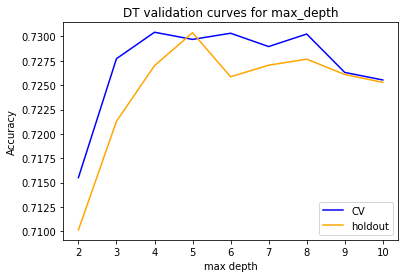

In [34]:
plt.plot(max_depth_values,cv_accuracies_by_depth,label='CV',c='blue')
plt.plot(max_depth_values,ho_accuracies_by_depth,label='holdout',c='orange')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [23]:
age1=pd.get_dummies(df['age in years'])

In [24]:
age4050=age1.iloc[:,3]+age1.iloc[:,4]+age1.iloc[:,5]+age1.iloc[:,6]+age1.iloc[:,7]+age1.iloc[:,8]+age1.iloc[:,9]+age1.iloc[:,10]+age1.iloc[:,11]+age1.iloc[:,12]

In [25]:
age5060=age1.iloc[:,13]+age1.iloc[:,14]+age1.iloc[:,15]+age1.iloc[:,16]+age1.iloc[:,17]+age1.iloc[:,18]+age1.iloc[:,19]+age1.iloc[:,20]+age1.iloc[:,21]+age1.iloc[:,22]

In [26]:
age6065=age1.iloc[:,23]+age1.iloc[:,24]+age1.iloc[:,25]+age1.iloc[:,26]+age1.iloc[:,27]

In [27]:
df.insert(loc=len(df.columns), column='age4050', value=age4050)
df.insert(loc=len(df.columns), column='age5060', value=age5060)
df.insert(loc=len(df.columns), column='age6065', value=age6065)

In [28]:
ap_hi_new=pd.get_dummies(pd.cut(df['ap_hi'],bins=[120,140]))

In [29]:
ap_hi_new2=pd.get_dummies(pd.cut(df['ap_hi'],bins=[140,160]))

In [30]:
ap_hi_new3=pd.get_dummies(pd.cut(df['ap_hi'],bins=[160,180]))

In [31]:
df.insert(loc=len(df.columns), column='ap_hi_new', value=ap_hi_new)
df.insert(loc=len(df.columns), column='ap_hi_new2', value=ap_hi_new2)
df.insert(loc=len(df.columns), column='ap_hi_new3', value=ap_hi_new3)

In [32]:
df['gender']=df['gender'].map({'1':0,'2':1})

In [33]:
df=df.rename(columns={'gender':'male'})

In [34]:
df_new=df.drop(['age', 'male', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol','gluc', 'smoke', 'alco', 'active','age in years'],axis=1)

In [36]:
df.columns

Index(['age', 'male', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age in years',
       'cholesterol1', 'cholesterol2', 'cholesterol3', 'gluc1', 'gluc2',
       'gluc3', 'age4050', 'age5060', 'age6065', 'ap_hi_new', 'ap_hi_new2',
       'ap_hi_new3'],
      dtype='object')

In [37]:
df_new.columns

Index(['cardio', 'cholesterol1', 'cholesterol2', 'cholesterol3', 'gluc1',
       'gluc2', 'gluc3', 'age4050', 'age5060', 'age6065', 'ap_hi_new',
       'ap_hi_new2', 'ap_hi_new3'],
      dtype='object')

In [56]:
X2,y2=df_new.drop('cardio',axis=1),df_new['cardio']

from sklearn.model_selection import train_test_split
X_train2,X_holdout2,y_train2,y_holdout2=train_test_split(X2,y2,test_size=0.3,random_state=17)

In [58]:
last_tree=DecisionTreeClassifier(random_state=17,max_depth=3)
last_tree.fit(X_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [59]:
dot_data=StringIO()
export_graphviz(decision_tree=last_tree,out_file=dot_data,filled=True,feature_names=df_new.drop('cardio',axis=1).columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xde\x00\x00\x01\xf1\x08\x06\x00\x00\x00s\xbd\xae…

In [ ]:
#Systolic blood pressure from 140 to 160 (mmHg)